## Deep Learning Regularization

😓Be well prepared that when the code worked for me, may not work for you any more. It took me so much time tonight to debug, upgrade/install packages, change deprecated functions or just ignore warnings.... All because of the frequent changes in these open source packages. So, when it's your turn to try the code, who knows whether it still works...

💝However, when you are seeing my code, you are lucky! At least I took the note on those things need to care about, including the solutions.

❣️Also note, the model evaluation here I didn't evauate all the testing data, because of the labeling time for all those testing image can be huge and I'm really busy. <b>However</b>, you can pay attention to those val_acc and val_loss, lower the better

Reference: https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29

<b>Get data from here</b>: https://datahack.analyticsvidhya.com/contest/practice-problem-identify-the-digits/

In [12]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from imageio import imread
from sklearn.metrics import accuracy_score
import pylab

import tensorflow as tf
import keras

### NOTE

You may got an error saying cannot import module "weakref". This problem was not exist before but just appeared...
Here's my solution:
1. Find your tensorflow path by typing `pip show tensorflow`
2. Find tensorflow/python/util/tf_should_use.py, open it
3. Change `from backports import weakref` to `import weakref`
4. Then comment the line that contains `finalize()` function, this is for garbage collection, but finalize function does not exist in weakref in my case.... 😓
5. Restart your ipython

In [13]:
seed = 10
rng = np.random.RandomState(seed)

In [14]:
train = pd.read_csv('digit_recognition/train.csv')
test = pd.read_csv('digit_recognition/test.csv')

train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


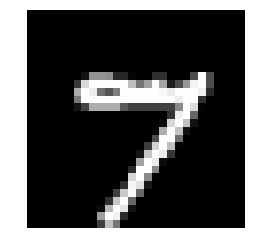

In [15]:
img_name = rng.choice(train.filename)
training_image_path = 'digit_recognition/Images/train/' + img_name

training_img = imread(training_image_path, as_gray=True)

pylab.imshow(training_img, cmap='gray')
pylab.axis('off')
pylab.show()

In [7]:
training_img[7:9]

Image([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  20., 147., 147., 142.,
         39.,  39.,   4.,   0.,   0.,  46.,  50.,   0.,   0.,   0.,  77.,
        254.,  76.,   0.,   0.,   0.,   0.]], dtype=float32)

In [16]:
# store all images as numpy arrays, to make data manipulation easier

temp = []
for img_name in train.filename:
    training_image_path = 'digit_recognition/Images/train/' + img_name
    training_img = imread(training_image_path, as_gray=True)
    img = training_img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

train_x /= 255.0
train_x = train_x.reshape(-1, 784).astype('float32')

temp = []
for img_name in test.filename:
    testing_image_path = 'digit_recognition/Images/test/' + img_name
    testing_img = imread(testing_image_path, as_gray=True)
    img = testing_img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

test_x /= 255.0
test_x = test_x.reshape(-1, 784).astype('float32')

In [18]:
train_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
train_y = keras.utils.np_utils.to_categorical(train.label.values)

In [20]:
# split into training and validation sets, 7:3

split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

In [21]:
train.label.iloc[split_size:split_size+2]

34300    3
34301    1
Name: label, dtype: int64

In [22]:
from keras.models import Sequential
from keras.layers import Dense

# define variables
input_num_units = 784
hidden1_num_units = 500
hidden2_num_units = 500
hidden3_num_units = 500
hidden4_num_units = 500
hidden5_num_units = 500
output_num_units = 10

epochs = 10
batch_size = 128

### NOTE

Keras updated to 2.0
Without updating keras, the way you used `Dense()` function may keep giving warnings

* Here's Keras 2.0 documentation: https://keras.io/
* To update keras, type `sudo pip install --upgrade keras==2.1.3`. Has to be keras 2.1.3, if it's higher, softmax may get an error below.... (this is why I hate deep learning when you have to use open source!)
* Holy s**t, even after the updating, you will get many warnings again, just ignore them..

In [78]:
# Method 1 - Without Regularization
import warnings
warnings.filterwarnings('ignore')

model = Sequential()
model.add(Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'))
model.add(Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'))
model.add(Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'))
model.add(Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'))
model.add(Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'))
model.add(Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'))
model.add(Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'))

In [79]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y)) 

Train on 34300 samples, validate on 14700 samples
Epoch 1/10
34300/34300 [==============================] - 20s 595us/step - loss: 0.3075 - acc: 0.9044 - val_loss: 0.1898 - val_acc: 0.9454
Epoch 2/10
34300/34300 [==============================] - 19s 562us/step - loss: 0.1248 - acc: 0.9633 - val_loss: 0.1333 - val_acc: 0.9607
Epoch 3/10
34300/34300 [==============================] - 20s 572us/step - loss: 0.0876 - acc: 0.9734 - val_loss: 0.1119 - val_acc: 0.9705
Epoch 4/10
34300/34300 [==============================] - 20s 586us/step - loss: 0.0627 - acc: 0.9806 - val_loss: 0.1204 - val_acc: 0.9681
Epoch 5/10
34300/34300 [==============================] - 20s 586us/step - loss: 0.0545 - acc: 0.9838 - val_loss: 0.1187 - val_acc: 0.9711
Epoch 6/10
34300/34300 [==============================] - 20s 588us/step - loss: 0.0470 - acc: 0.9858 - val_loss: 0.1165 - val_acc: 0.9731
Epoch 7/10
34300/34300 [==============================] - 20s 593us/step - loss: 0.0437 - acc: 0.9873 - val_loss: 0.

Prediction is:  9


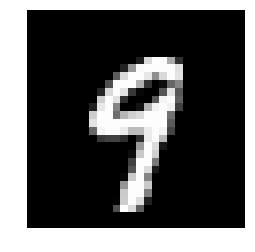

In [66]:
# one sample evaluation

pred = model.predict_classes(test_x)

img_name = rng.choice(test.filename)
testing_image_path = 'digit_recognition/Images/test/' + img_name
testing_img = imread(testing_image_path, as_gray=True)

test_index = int(img_name.split('.')[0]) - train.shape[0]

print "Prediction is: ", pred[test_index]

pylab.imshow(testing_img, cmap='gray')
pylab.axis('off')
pylab.show()

In [68]:
from keras import regularizers

In [80]:
# Method 2 - With L2 regularizer

model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.0001)),  # lambda  = 0.0001
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.0001)),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.0001)),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.0001)),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.0001)),
 Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

In [81]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/10
34300/34300 [==============================] - 44s 1ms/step - loss: 0.4895 - acc: 0.9100 - val_loss: 0.3137 - val_acc: 0.9559
Epoch 2/10
34300/34300 [==============================] - 72s 2ms/step - loss: 0.2882 - acc: 0.9628 - val_loss: 0.2913 - val_acc: 0.9612
Epoch 3/10
34300/34300 [==============================] - 41s 1ms/step - loss: 0.2332 - acc: 0.9743 - val_loss: 0.2642 - val_acc: 0.9664
Epoch 4/10
34300/34300 [==============================] - 43s 1ms/step - loss: 0.2073 - acc: 0.9789 - val_loss: 0.2475 - val_acc: 0.9665
Epoch 5/10
34300/34300 [==============================] - 31s 918us/step - loss: 0.1816 - acc: 0.9837 - val_loss: 0.2258 - val_acc: 0.9705
Epoch 6/10
34300/34300 [==============================] - 27s 802us/step - loss: 0.1630 - acc: 0.9857 - val_loss: 0.2180 - val_acc: 0.9710
Epoch 7/10
34300/34300 [==============================] - 29s 855us/step - loss: 0.1530 - acc: 0.9862 - val_loss: 0.2126 - v

In [82]:
# Method 3 - L1 Regularizer

model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.0001)),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.0001)),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.0001)),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.0001)),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.0001)),
 Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

In [83]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/10
34300/34300 [==============================] - 27s 799us/step - loss: 2.8674 - acc: 0.9038 - val_loss: 1.7857 - val_acc: 0.9503
Epoch 2/10
34300/34300 [==============================] - 28s 804us/step - loss: 1.3601 - acc: 0.9543 - val_loss: 1.0440 - val_acc: 0.9523
Epoch 3/10
34300/34300 [==============================] - 28s 806us/step - loss: 0.8408 - acc: 0.9619 - val_loss: 0.7174 - val_acc: 0.9544
Epoch 4/10
34300/34300 [==============================] - 28s 805us/step - loss: 0.5903 - acc: 0.9688 - val_loss: 0.5198 - val_acc: 0.9683
Epoch 5/10
34300/34300 [==============================] - 29s 843us/step - loss: 0.4596 - acc: 0.9717 - val_loss: 0.4388 - val_acc: 0.9662
Epoch 6/10
34300/34300 [==============================] - 28s 805us/step - loss: 0.3848 - acc: 0.9737 - val_loss: 0.4031 - val_acc: 0.9627
Epoch 7/10
34300/34300 [==============================] - 30s 883us/step - loss: 0.3303 - acc: 0.9776 - val_loss: 0.

In [84]:
# method 4 - Dropout
from keras.layers.core import Dropout

model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(0.25),  # the drop probability is 0.25
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

In [85]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/10
34300/34300 [==============================] - 27s 787us/step - loss: 0.4204 - acc: 0.8669 - val_loss: 0.1686 - val_acc: 0.9507
Epoch 2/10
34300/34300 [==============================] - 26s 771us/step - loss: 0.1715 - acc: 0.9497 - val_loss: 0.1343 - val_acc: 0.9601
Epoch 3/10
34300/34300 [==============================] - 26s 763us/step - loss: 0.1356 - acc: 0.9606 - val_loss: 0.1173 - val_acc: 0.9668
Epoch 4/10
34300/34300 [==============================] - 27s 776us/step - loss: 0.1038 - acc: 0.9692 - val_loss: 0.1060 - val_acc: 0.9705
Epoch 5/10
34300/34300 [==============================] - 30s 881us/step - loss: 0.0897 - acc: 0.9738 - val_loss: 0.1223 - val_acc: 0.9676
Epoch 6/10
34300/34300 [==============================] - 29s 841us/step - loss: 0.0785 - acc: 0.9774 - val_loss: 0.1158 - val_acc: 0.9703
Epoch 7/10
34300/34300 [==============================] - 27s 793us/step - loss: 0.0673 - acc: 0.9806 - val_loss: 0.

In [26]:
# method 5 - early stopping
from keras.callbacks import EarlyStopping
from keras.layers.core import Dropout
import warnings
warnings.filterwarnings('ignore')

model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(0.25),  # the drop probability is 0.25
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y),
                            callbacks = [EarlyStopping(monitor='val_acc', patience=2)])

Train on 34300 samples, validate on 14700 samples
Epoch 1/10
34300/34300 [==============================] - 20s 582us/step - loss: 0.4231 - acc: 0.8689 - val_loss: 0.2190 - val_acc: 0.9376
Epoch 2/10
34300/34300 [==============================] - 18s 516us/step - loss: 0.1737 - acc: 0.9499 - val_loss: 0.1651 - val_acc: 0.9529
Epoch 3/10
34300/34300 [==============================] - 15s 450us/step - loss: 0.1371 - acc: 0.9607 - val_loss: 0.1119 - val_acc: 0.9675
Epoch 4/10
34300/34300 [==============================] - 16s 469us/step - loss: 0.1083 - acc: 0.9681 - val_loss: 0.1044 - val_acc: 0.9703
Epoch 5/10
34300/34300 [==============================] - 18s 529us/step - loss: 0.0880 - acc: 0.9736 - val_loss: 0.1034 - val_acc: 0.9720
Epoch 6/10
34300/34300 [==============================] - 16s 455us/step - loss: 0.0793 - acc: 0.9769 - val_loss: 0.1121 - val_acc: 0.9707
Epoch 7/10
34300/34300 [==============================] - 15s 446us/step - loss: 0.0708 - acc: 0.9793 - val_loss: 0.

In [9]:
# method 6 - Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zca_whitening=True)  
# zca_whitening as the argument, will highlight the outline of each digit

In [11]:
train = pd.read_csv('digit_recognition/train.csv')

temp = []
for img_name in train.filename:
    training_image_path = 'digit_recognition/Images/train/' + img_name
    training_img = imread(training_image_path, as_gray=True)
    img = training_img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

# The difference with above starts from here:
train_x = train_x.reshape(train_x.shape[0], 1, 28, 28)
train_x = train_x.astype('float32')

In [ ]:
# fit parameters from data
## fit the training data in order to augment
datagen.fit(train_x)  # This will often cause the kernel to die on my machine

# data spliting
split_size = int(train_x.shape[0]*0.7)
train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

# train the model with drop out
model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(0.25),  # the drop probability is 0.25
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

### Observations

1. Comparing the val_loss and vall_acc between each regularizer and the first method, we can see dropout works best and it is thr only one that has lower val_loss and higher val_acc. 
2. In the experiments here, after we applied early stopping on dropout it didn't give better results, maybe it needs more `patience`, because if we observe each epoch, the val_loss is not simply dropping along the way, it could increase in the middle and then drop again. This is why we need to be careful towards the number of epoch/patience
3. L1, L2 tend to give higher val_loss, especially L1
4. In my machine, with limited memory now, data augmentation failed, it will simply kill the kernel all the time. No wonder dropout is the most frequently used regularizer.....